In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\elham\Desktop\excel2\segmentation_data.csv")

In [3]:
df.shape

(2000, 8)

In [4]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
df.head(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
x=df[['Age','Income']]
x.head(2)

,Age,Income
0,67,124670
1,22,150773


In [8]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


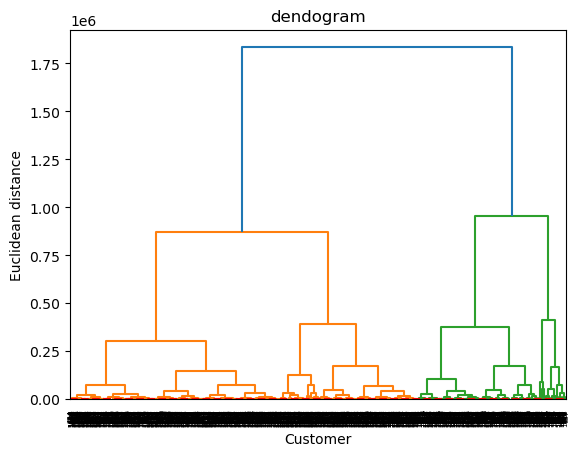

In [13]:
import scipy.cluster.hierarchy as hc
#using dendrogram to find optimal number of cluster
dendogram=hc.dendrogram(hc.linkage(x,method='ward'))
plt.title('dendogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')

plt.show()


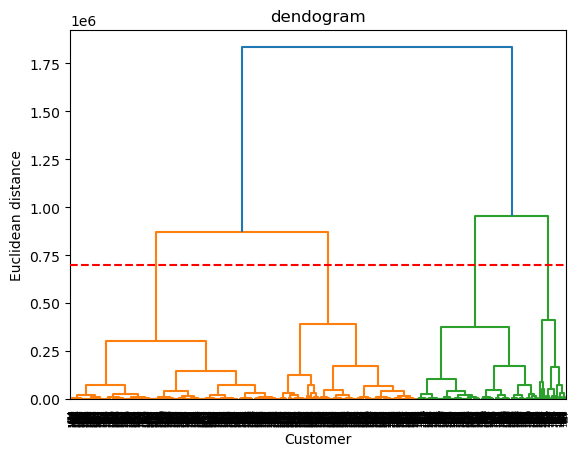

In [19]:

dendogram=hc.dendrogram(hc.linkage(x,method='ward'))
plt.title('dendogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.axhline(y=0.7e6, c='r', linestyle='--', zorder=10)
plt.show()

In [17]:
link_matrix = hc.linkage(x, method='ward')
print(link_matrix)


[[8.83000000e+02 1.00400000e+03 0.00000000e+00 2.00000000e+00]
 [4.95000000e+02 1.34400000e+03 1.00000000e+00 2.00000000e+00]
 [9.87000000e+02 1.02600000e+03 1.00000000e+00 2.00000000e+00]
 ...
 [3.99200000e+03 3.99400000e+03 8.72005813e+05 1.39900000e+03]
 [3.99300000e+03 3.99500000e+03 9.55718982e+05 6.01000000e+02]
 [3.99600000e+03 3.99700000e+03 1.83430579e+06 2.00000000e+03]]


In [25]:
#number of clusters=4
#using Agglomerative hierarchical, affinity='euclidean'
from sklearn.cluster import AgglomerativeClustering

hc_agg=AgglomerativeClustering(n_clusters=4,linkage='ward')
y_hc=hc_agg.fit_predict(x)
print(y_hc)

[3 2 1 ... 1 1 1]


In [27]:
lable=np.unique(y_hc)
lable

array([0, 1, 2, 3], dtype=int64)

In [28]:
x.head(2)

,Age,Income
0,67,124670
1,22,150773


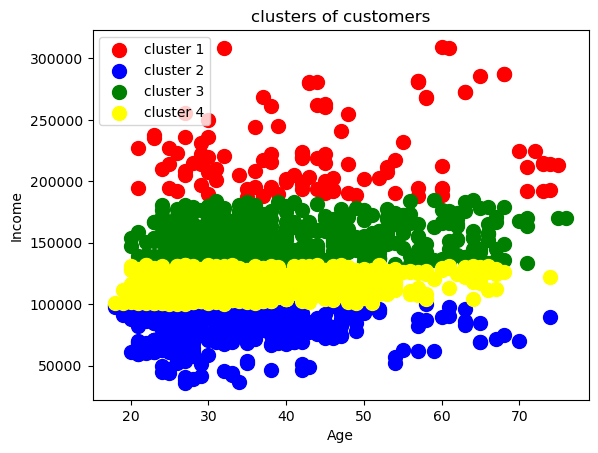

In [32]:
plt.scatter(x.iloc[y_hc==0,0],x.iloc[y_hc==0,1],s=100,c='r',label='cluster 1')
plt.scatter(x.iloc[y_hc==1,0],x.iloc[y_hc==1,1],s=100,c='b',label='cluster 2')
plt.scatter(x.iloc[y_hc==2,0],x.iloc[y_hc==2,1],s=100,c='g',label='cluster 3')
plt.scatter(x.iloc[y_hc==3,0],x.iloc[y_hc==3,1],s=100,c='yellow',label='cluster 4')

plt.title('clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()